In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
imb = pd.read_csv("../data/imbalance_1h_nooutliers.csv")

In [4]:
imb

,datetime,imbalance_price_target,year,month,day,weekday,hour
0,2013-12-31 23:00:00,92.620000,2013.0,12.000000,31.000000,1.000000,23.000000
1,2014-01-01 00:00:00,82.465000,2014.0,1.000000,1.000000,2.000000,0.000000
2,2014-01-01 01:00:00,50.305000,2014.0,1.000000,1.000000,2.000000,1.000000
3,2014-01-01 02:00:00,-42.080000,2014.0,1.000000,1.000000,2.000000,2.000000
4,2014-01-01 03:00:00,-28.995000,2014.0,1.000000,1.000000,2.000000,3.000000
...,...,...,...,...,...,...,...
64244,2021-04-30 19:00:00,78.270000,2021.0,4.000000,30.000000,4.000000,19.000000
64245,2021-04-30 20:00:00,85.390000,2021.0,4.000000,30.000000,4.000000,20.000000
64246,2021-04-30 21:00:00,82.020000,2021.0,4.000000,30.000000,4.000000,21.000000
64247,2021-04-30 22:00:00,74.292857,2021.0,4.142857,25.857143,4.142857,18.571429


In [5]:
merge = pd.read_csv("../data/dataset_merged.csv")

In [6]:
merge

,dt_start_utc,windspeed_ms,epex_da_de_eur_mwh,solar_mw_fiftyhertz,solar_mw_tennet,solar_mw_amprion,solar_mw_transnetbw,solar_mw_nrv,fc_da,fc_load_50H,...,fc_onshore_DK1,offshore_mw_fiftyhertz,offshore_mw_tennet,offshore_mw_nrv,onshore_mw_fiftyhertz,onshore_mw_tennet,onshore_mw_amprion,onshore_mw_transnetbw,onshore_mw_nrv,imbalance_price_target
0,2019-01-01 00:00:00,13.7925,10.07,0.0,0.00,0.0,0.0,0.00,29.730,6150.5,...,2342.0,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15,-329.6045
1,2019-01-01 01:00:00,14.3600,-4.08,0.0,0.00,0.0,0.0,0.00,26.050,6029.0,...,2227.0,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02,-283.8000
2,2019-01-01 02:00:00,15.0180,-9.91,0.0,0.00,0.0,0.0,0.00,23.760,6057.0,...,2163.0,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03,-334.7170
3,2019-01-01 03:00:00,14.8220,-7.41,0.0,0.00,0.0,0.0,0.00,20.950,6122.5,...,2108.0,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39,117.6665
4,2019-01-01 04:00:00,14.5930,-12.55,0.0,0.00,0.0,0.0,0.00,15.770,6152.0,...,2142.0,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98,-323.3150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15331,2020-09-30 19:00:00,6.1635,49.92,0.0,0.03,0.0,0.0,0.03,53.555,11108.5,...,631.0,128.69,4628.28,4756.97,651.60,3648.29,1620.00,179.00,6098.89,-130.1485
15332,2020-09-30 20:00:00,5.9385,42.79,0.0,0.05,0.0,0.0,0.05,46.200,10454.5,...,701.0,140.73,5055.73,5196.46,707.77,3953.82,1977.75,259.00,6898.34,-248.8910
15333,2020-09-30 21:00:00,6.0630,35.02,0.0,0.05,0.0,0.0,0.05,40.030,9635.5,...,765.0,174.31,5165.00,5339.31,779.20,3957.25,2123.75,284.25,7144.45,157.6065
15334,2020-09-30 22:00:00,6.2825,34.40,0.0,0.06,0.0,0.0,0.06,37.970,9068.0,...,904.0,273.28,5123.26,5396.54,847.60,4031.58,2152.50,326.25,7357.93,74.1135


In [7]:
merge = merge.set_index('dt_start_utc')

In [8]:
merge.index = pd.to_datetime(merge.index)

In [9]:
merge.columns

Index(['windspeed_ms', 'epex_da_de_eur_mwh', 'solar_mw_fiftyhertz',
       'solar_mw_tennet', 'solar_mw_amprion', 'solar_mw_transnetbw',
       'solar_mw_nrv', 'fc_da', 'fc_load_50H', 'fc_load_DE', 'fc_load_DK',
       'fc_load_DK1', 'fc_load_TTG', 'fc_solar_50H', 'fc_solar_DE',
       'fc_solar_DK', 'fc_solar_DK1', 'fc_solar_TTG', 'fc_offshore_DE',
       'fc_offshore_DK', 'fc_offshore_DK1', 'fc_offshore_TTG',
       'fc_onshore_50H', 'fc_onshore_DE', 'fc_onshore_DK', 'fc_onshore_DK1',
       'offshore_mw_fiftyhertz', 'offshore_mw_tennet', 'offshore_mw_nrv',
       'onshore_mw_fiftyhertz', 'onshore_mw_tennet', 'onshore_mw_amprion',
       'onshore_mw_transnetbw', 'onshore_mw_nrv', 'imbalance_price_target'],
      dtype='object')

In [10]:
merge.drop('imbalance_price_target', axis=1, inplace=True)

In [11]:
imb[(imb['datetime'] < '2020-01-01 00:00:00') & (imb['datetime'] >= '2019-01-01 00:00:00')]['imbalance_price_target']

43825     -3.465
43826     -3.735
43827     -9.250
43828     11.355
43829     -4.925
          ...   
52580     29.645
52581     21.000
52582      1.610
52583    101.790
52584     53.680
Name: imbalance_price_target, Length: 8760, dtype: float64

In [12]:
imb_merge = imb[(imb['datetime'] < '2020-10-01 00:00:00') & (imb['datetime'] >= '2019-01-01 00:00:00')]

In [13]:
imb_merge = imb_merge.set_index('datetime')

In [14]:
imb_merge.index = pd.to_datetime(imb_merge.index)

In [15]:
imb_merge

,imbalance_price_target,year,month,day,weekday,hour
datetime,,,,,,
2019-01-01 00:00:00,-3.465,2019.0,1.0,1.0,1.0,0.0
2019-01-01 01:00:00,-3.735,2019.0,1.0,1.0,1.0,1.0
2019-01-01 02:00:00,-9.250,2019.0,1.0,1.0,1.0,2.0
2019-01-01 03:00:00,11.355,2019.0,1.0,1.0,1.0,3.0
2019-01-01 04:00:00,-4.925,2019.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...
2020-09-30 19:00:00,16.450,2020.0,9.0,30.0,2.0,19.0
2020-09-30 20:00:00,26.050,2020.0,9.0,30.0,2.0,20.0
2020-09-30 21:00:00,56.265,2020.0,9.0,30.0,2.0,21.0


In [16]:
merge['month'] = merge.index.month
merge['weekday'] = merge.index.weekday
merge['hour'] = merge.index.hour
merge['imbalance_price_target'] = imb_merge['imbalance_price_target']

In [17]:
merge

,windspeed_ms,epex_da_de_eur_mwh,solar_mw_fiftyhertz,solar_mw_tennet,solar_mw_amprion,solar_mw_transnetbw,solar_mw_nrv,fc_da,fc_load_50H,fc_load_DE,...,offshore_mw_nrv,onshore_mw_fiftyhertz,onshore_mw_tennet,onshore_mw_amprion,onshore_mw_transnetbw,onshore_mw_nrv,month,weekday,hour,imbalance_price_target
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,13.7925,10.07,0.0,0.00,0.0,0.0,0.00,29.730,6150.5,41218.5,...,5684.34,9231.31,11624.89,3039.50,105.45,24001.15,1,1,0,-3.465
2019-01-01 01:00:00,14.3600,-4.08,0.0,0.00,0.0,0.0,0.00,26.050,6029.0,40139.0,...,5334.19,10012.16,12762.32,3576.50,112.04,26463.02,1,1,1,-3.735
2019-01-01 02:00:00,15.0180,-9.91,0.0,0.00,0.0,0.0,0.00,23.760,6057.0,39917.0,...,5278.54,10852.08,13988.91,4094.75,164.29,29100.03,1,1,2,-9.250
2019-01-01 03:00:00,14.8220,-7.41,0.0,0.00,0.0,0.0,0.00,20.950,6122.5,40282.0,...,5160.90,11761.89,14809.73,4685.25,226.52,31483.39,1,1,3,11.355
2019-01-01 04:00:00,14.5930,-12.55,0.0,0.00,0.0,0.0,0.00,15.770,6152.0,40528.0,...,5001.96,13125.93,15131.73,5024.50,315.82,33597.98,1,1,4,-4.925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,6.1635,49.92,0.0,0.03,0.0,0.0,0.03,53.555,11108.5,56709.0,...,4756.97,651.60,3648.29,1620.00,179.00,6098.89,9,2,19,16.450
2020-09-30 20:00:00,5.9385,42.79,0.0,0.05,0.0,0.0,0.05,46.200,10454.5,53241.0,...,5196.46,707.77,3953.82,1977.75,259.00,6898.34,9,2,20,26.050
2020-09-30 21:00:00,6.0630,35.02,0.0,0.05,0.0,0.0,0.05,40.030,9635.5,49149.0,...,5339.31,779.20,3957.25,2123.75,284.25,7144.45,9,2,21,56.265


In [18]:
merge.to_csv("../data/merged_final_1h.csv")

<AxesSubplot:>

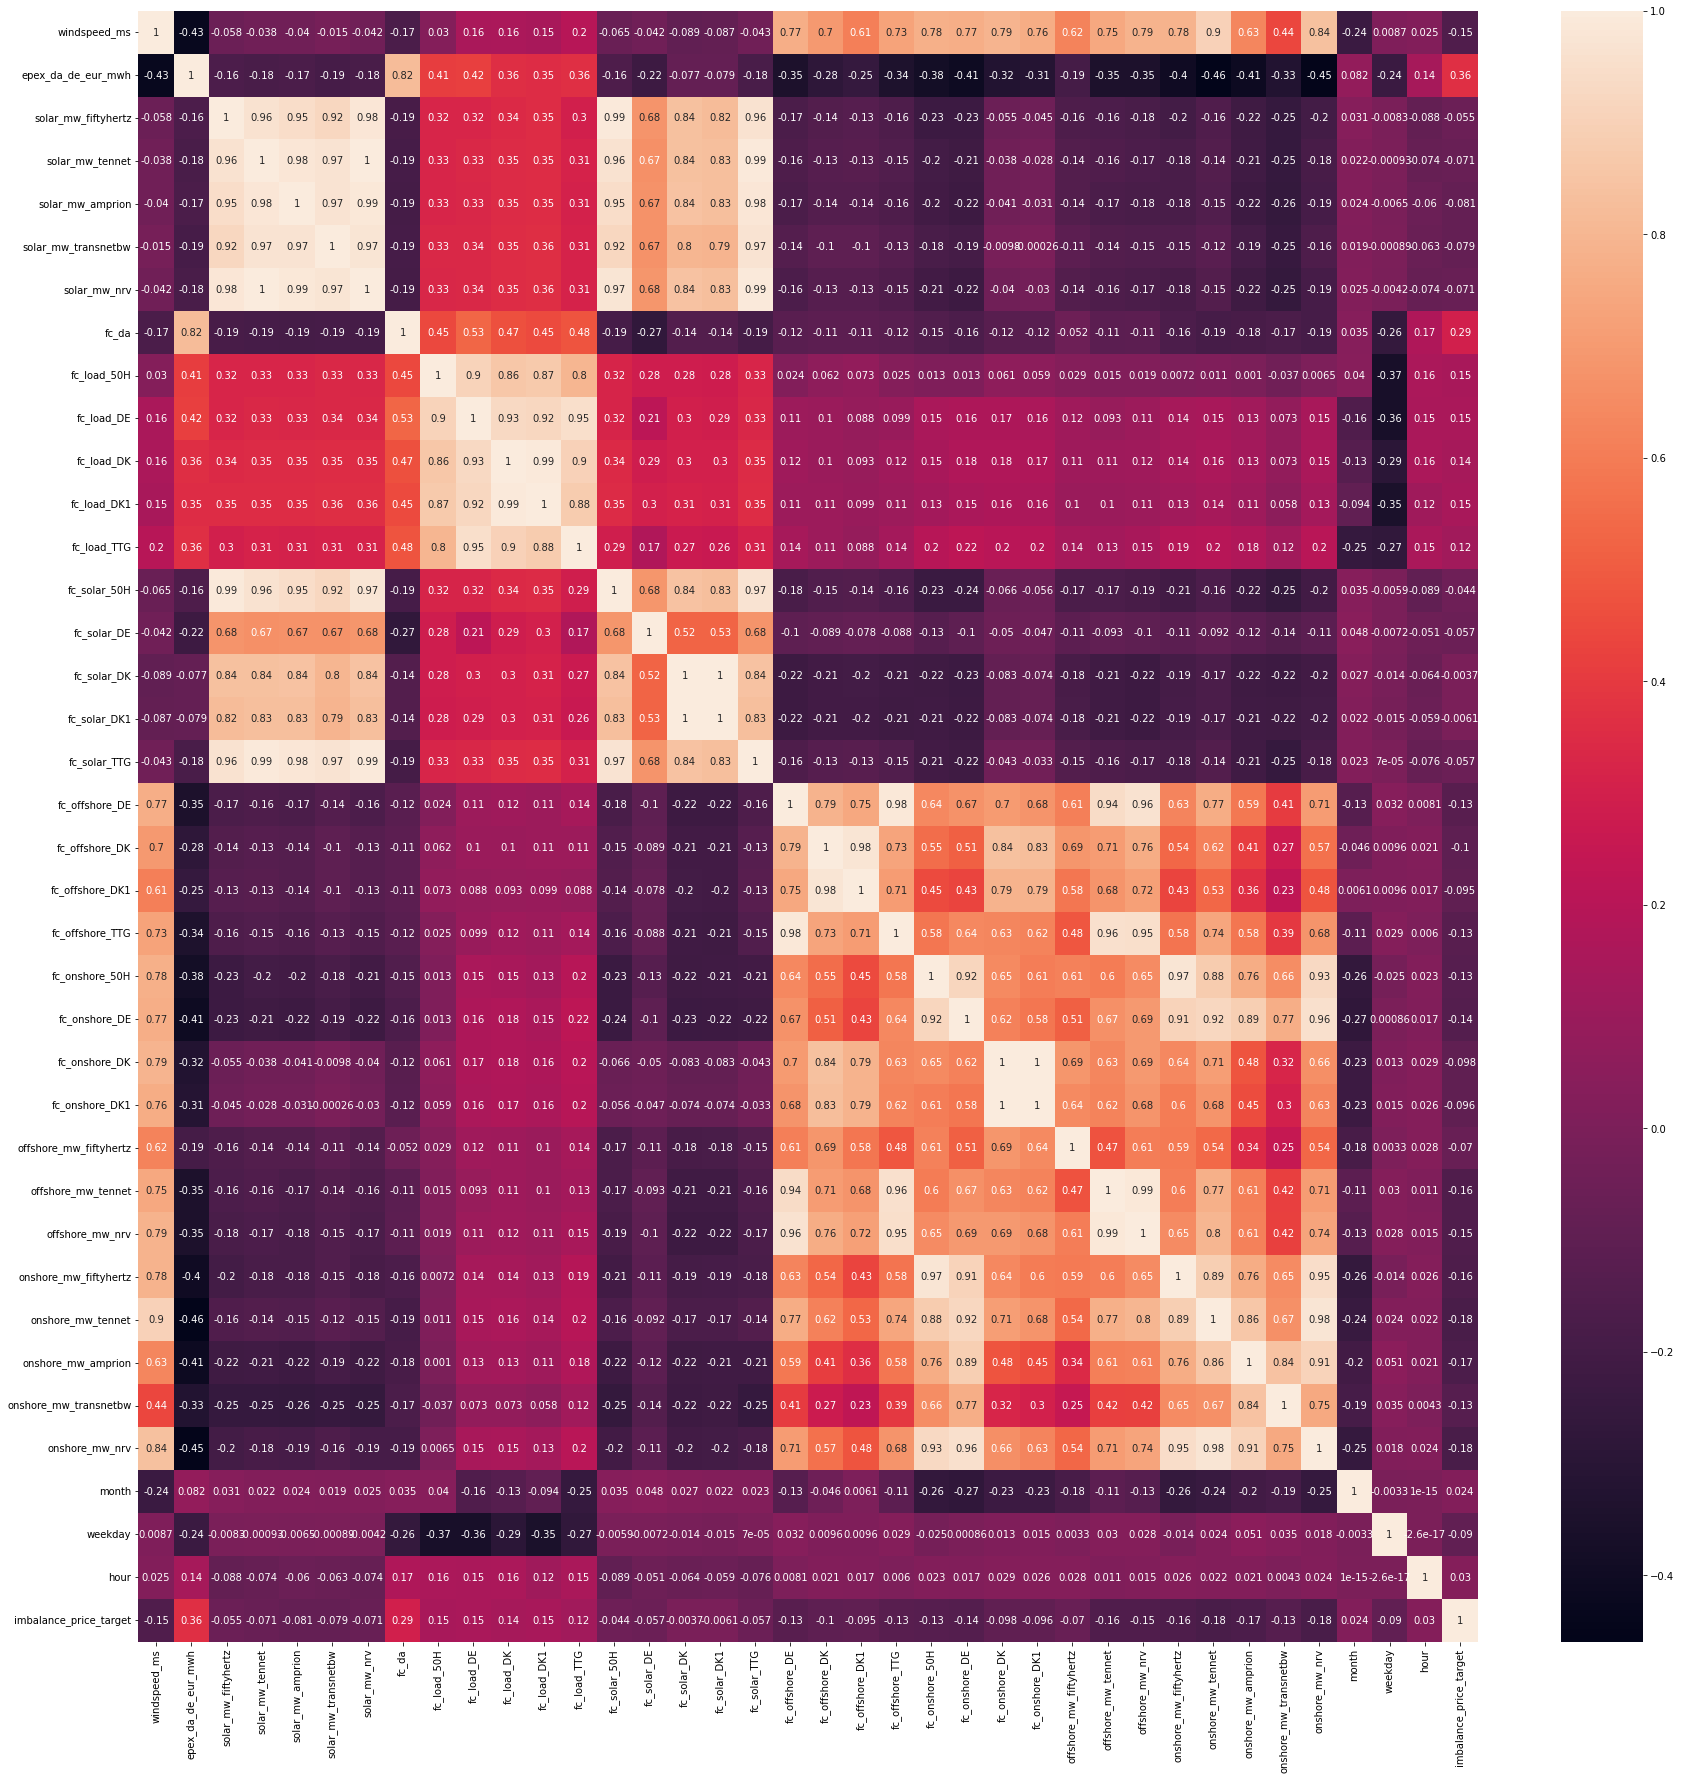

In [30]:
plt.figure(figsize=(30, 30))
sns.heatmap(merge.corr(), annot=True)

In [37]:
np.abs(merge.corr()['imbalance_price_target']).sort_values(ascending=False)

imbalance_price_target    1.000000
epex_da_de_eur_mwh        0.364793
fc_da                     0.293340
onshore_mw_tennet         0.177514
onshore_mw_nrv            0.176882
onshore_mw_amprion        0.168403
onshore_mw_fiftyhertz     0.157060
offshore_mw_tennet        0.155954
fc_load_DE                0.153676
offshore_mw_nrv           0.153254
windspeed_ms              0.151463
fc_load_50H               0.148706
fc_load_DK1               0.148128
fc_load_DK                0.144382
fc_onshore_DE             0.138386
fc_onshore_50H            0.129361
onshore_mw_transnetbw     0.128856
fc_offshore_DE            0.126139
fc_offshore_TTG           0.125461
fc_load_TTG               0.122480
fc_offshore_DK            0.101867
fc_onshore_DK             0.097976
fc_onshore_DK1            0.095836
fc_offshore_DK1           0.095089
weekday                   0.090114
solar_mw_amprion          0.081455
solar_mw_transnetbw       0.079424
solar_mw_tennet           0.071204
solar_mw_nrv        

fc_da                     0.293340
fc_load_DE                0.153676
windspeed_ms              0.151463
fc_onshore_DE             0.138386
fc_offshore_DE            0.126139
weekday                   0.090114
fc_solar_DE               0.056843
hour                      0.029873
month                     0.024346